# Import Dependancies

In [29]:
import numpy as np
import pandas as pd
import warnings
import copy
warnings.filterwarnings("ignore")

# Read csv using Pandas

CSV Source:
https://archive.ics.uci.edu/ml/datasets/online+news+popularity

In [2]:
# read data into dataframe
df = pd.read_csv("OnlineNewsPopularity.csv") 

# Dropping Attributes

Attributes 0-1 and 13-38 are dropped, leaving 33 attributes left

In [3]:
# drop unused features
vals = [0, 1]
for i in range(13, 39):
    vals.append(i)

df = df.drop(df.columns[vals], axis = 1)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Mean vector and total variance
Compute the mean vector μ for the data matrix, and then compute the total variance var(D); see Eq. (1.8) for the latter.

Helper Function for the Magnitude

In [4]:
# define magnitude function to return the magnitude of a given vector
def mag(vec):
    x = np.sqrt(np.dot(vec, vec))
    return x

### Mean Vector Calculation
Calculate mean for every attribute and store in a vector

In [5]:
# calculate mean vector 
# mean for each attribute
mean_vector = []

for i in range(1, 34):
    tot = df.iloc[ : , i-1:i].sum()[0]
    s = len(df.iloc[ : , i-1:i])
    mean_vector.append(tot / s)
    
print(mean_vector)


[10.398748864897588, 546.514731106851, 0.5482157168486131, 0.9964685654578609, 0.6891753940079294, 10.883689839572192, 3.2936383815962063, 4.544142871556856, 1.2498738775098375, 4.548239318341828, 7.223766522046211, 0.18459904828385124, 0.1412557731283032, 0.21632096677306634, 0.22376961651356772, 0.2340293708031828, 0.443370199550738, 0.11930926928571745, 0.039624833009040954, 0.016612119534643015, 0.6821502211003009, 0.2879335242331674, 0.35382494340707155, 0.09544553807024497, 0.7567275436995321, -0.25952414109091815, -0.5219437277484054, -0.10750024015634482, 0.2823531841135628, 0.07142543197593561, 0.34184275596034774, 0.1560636628565405, 3395.3801836343455]


### Total Variance Calculation
Total variance across all the data. Based off the formula 1.8 in the textbook.
Subtract the mean vector from the data point (row vector). Find the magnitude and square it.
Sum all the squared magnitudes for all rows and divide by the number of rows.

In [6]:
# store dataframe as 2D array
matrix = df.to_numpy()


# calculate total variance
# tot. var. is a scalar, which is the sum of the squared magnitude of the data point minus the mean
var = 0

# iterate through the data points (rows)
for i in range(len(matrix)):
    m = mag(matrix[i] - np.array(mean_vector)) # ||xi - u||
    m2 = m * m                                 # ||xi - u||^2
    var += m2                                  # summation from i = 0 to N

var = var / len(matrix) # divide by N ( number of points )
print("Total Variance:", var)


# # iterate over every row in the column
# # build the column data into a vector
# for i in range(len(matrix[0])):
#     # store the attribute data in a vector 
#     vec = []
#     for j in range(len(matrix)):
#         vec.append(matrix[j][i])
        
#     # calculate total variance for the attribute
#     mean = mean_vector[i]
#     summation = 0
#     for j in range(len(vec)):
#         diff = vec[j] - mean_vector[i]
#         diff_squ = diff * diff
#         summation += diff_squ
    
#     variance = summation / len(matrix)
#     var.append(variance)

# print(var)



Total Variance: 135404799.73772162


# Covariance matrix (inner and outer product form)
Compute the sample covariance matrix Σ as inner products between the attributes of the centered data matrix (see Eq. (2.38) in chapter 2). Next compute the sample covariance matrix as sum of the outer products between the centered points (see Eq. (2.39)).

### Covariance using Inner Product
First the matrix must be centered, which means each point should have its mean subtracted from it. 
The matrix is then transposed to make the columns become the rows - this will make the calculations easier.
Calculations are based off center attribute vectors (column vectors).
Do a dxd pass (where d is the # of dimensions), and calculate the covariance for each i, j pair.
The resulting matrix will be square and hold the covariances.


In [7]:
# center each attribute vector in the matrix
# first make a deep copy of the matrix data
centered_matrix = copy.deepcopy(matrix)

# subtract the attribute's mean from the datapoints for each attribute
for i in range(len(centered_matrix[0])):
    for j in range(len(centered_matrix)):
        centered_matrix[j][i] = centered_matrix[j][i] - mean_vector[i]


# store the transposed matrix so that indices are columns
center_matrix_transpose = np.transpose(centered_matrix)

# calculate the sample cov matrix using the dot product of centered attr. vectors
sample_cov_matrix = []
for i in range(len(center_matrix_transpose)):
    # build matrix row by row
    row = []
    for j in range(len(center_matrix_transpose)):
        elem = np.dot(center_matrix_transpose[i], center_matrix_transpose[j]) / len(center_matrix_transpose[i])
        row.append(elem)
        
    sample_cov_matrix.append(row)


# output
for i in sample_cov_matrix:
    print(i)
    print()

# if you inspect the output closely, you will notice it is a 33x33 matrix, and symmetrical
# all elements on the diagonal are variances

[4.469038894755805, 18.0854386707421, -0.039582055453795485, -0.05257227177113588, -0.03740593472302277, -1.2815399299757135, -0.12107344204098561, -0.15560514866236577, 0.4468770493473033, -0.12745778161627186, -0.024525809214673316, -0.03893574265253917, 0.029524757718271195, 0.022882708852648877, 0.026338737025899638, -0.039775178206293935, -0.014011881985278416, -0.014799755267131854, -0.002393042774563055, 0.00035546888584295406, -0.026775010369091433, 0.011285053598041906, -0.010965848550319453, -0.0037792976214461073, -0.011346728196458208, -0.004616063758063355, -0.01788572127053054, 0.002303386333244133, 0.05294772641137632, 0.00013445254380069804, -0.058649460712369934, 0.01939824505219857, 215.88187511624108]

[18.0854386707421, 221936.6856623205, -7.8562198327749675, 43.15614223356752, 0.5740756486174439, 2258.5176678724065, 553.3454751080907, 1341.1221930320603, 200.67669946664148, 66.74582488211455, 65.51535718774909, 3.2480830742996463, -1.0064240765532781, 11.5992247348

### Covariance using Outer Product
The outer product method uses calculations based off the rows, so the non-transposed centered matrix will be used.
Take the outer product of the row vector and itself. This yields a dxd matrix. 
Sum these matrices for all rows in the data table. Then apply the scalar 1/n to the summation dxd matrix.
This matrix and the one calculated above contain the same data (ignoring floating point arithmetic error).
They also both have the same shape and symmetric protperty. 

In [8]:
# computing the cov matrix using the sum of the outer products 
outer_sample_cov_matrix = np.outer(centered_matrix[0], centered_matrix[0])

for i in range(1, len(centered_matrix)):
    # calculate the outer product
    outer_product = np.outer(centered_matrix[i], centered_matrix[i])
    # sum the outer product with the running summation
    outer_sample_cov_matrix = outer_sample_cov_matrix + outer_product
    
# apply the scalar 1/n
for i in range(len(outer_sample_cov_matrix)):
    for j in range(len(outer_sample_cov_matrix[0])):
        outer_sample_cov_matrix[i][j] = outer_sample_cov_matrix[i][j] / len(centered_matrix)


print(outer_sample_cov_matrix)

# both ways of computing the sample cov matrix yields the same result (ignoring small floating point errors)

[[ 4.46903889e+00  1.80854387e+01 -3.95820555e-02 ... -5.86494607e-02
   1.93982451e-02  2.15881875e+02]
 [ 1.80854387e+01  2.21936686e+05 -7.85621983e+00 ...  6.34662705e-01
   1.43271448e+00  1.34688547e+04]
 [-3.95820555e-02 -7.85621983e+00  1.23950745e+01 ... -6.14309369e-03
  -3.35931915e-03  3.30070096e+01]
 ...
 [-5.86494607e-02  6.34662705e-01 -6.14309369e-03 ...  3.56410689e-02
  -1.71000855e-02  3.25079931e+00]
 [ 1.93982451e-02  1.43271448e+00 -3.35931915e-03 ... -1.71000855e-02
   5.12077722e-02  7.13940172e+01]
 [ 2.15881875e+02  1.34688547e+04  3.30070096e+01 ...  3.25079931e+00
   7.13940172e+01  1.35182574e+08]]


# Correlation matrix as pair-wise cosines
Compute the correlation matrix for this dataset using the formula for the cosine between centered attribute vectors (see Eq. (2.30)).

Output which attribute pairs are i) the most correlated, ii) the most anti-correlated, and iii) the least correlated? You must print the "actual" names of these columns as well as the dimension index. For example, for the 33 valid dimensions, the first dimension is named "n_tokens_title". You can find the names and descriptions of all the valid attributes on the UCI dataset link above (you can get them from the first line of the csv file; do not hard code the names).

### Building the correlation matrix
This matrix will be a dxd matrix holding the correlation coefficients between attributes i and j.
Correlation coefficient is simply the cosine of the angle between tho centered attribute vectors.
Elements along the diagonal will have correlation  roughly equal to 1, because they are the same vectors.

Simply get the unit vectors of the centered attribute vectors by dividing the vectors by their magnitude.
Then do the dot product, and establish the bounds of [-1, 1].
This is done for all i, j attribute pairs.

The ouput is a correlation matrix with size dxd, where all the diagonals are 1 (except for tiny floating point errors).
This matrix is also symmetrical, since the dot product operation is commutative.

In [9]:

# compute the correlation matrix
correlation_matrix = []

for i in range(len(center_matrix_transpose)):
    # build matrix row by row
    row = []
    for j in range(len(center_matrix_transpose)):
        # x1 / ||x1||
        x1 = center_matrix_transpose[i]
        x1_mag = mag(center_matrix_transpose[i])
        x1 = x1 / x1_mag
        # x2 / ||x2||
        x2 = center_matrix_transpose[j]
        x2_mag = mag(center_matrix_transpose[j])
        x2 = x2 / x2_mag
        
        # dot product to find the cos()
        val = np.dot(x1, x2)
        
        # clip value b/w -1 to 1
        if val > 1.0:
            val = 1.0
        elif val < -1.0:
            val = -1.0
        
        # add value data to row 
        row.append(val)
    
    # add row data to matrix
    correlation_matrix.append(row)


for i in correlation_matrix:
    print(i)
    print()


[0.9999999999999984, 0.018159648247296385, -0.005318224975484705, -0.004753913346119596, -0.005419761363265809, -0.05349624767932103, -0.014856175336605267, -0.008858311652911122, 0.05146018540651383, -0.07140254288450633, -0.006076957035837798, -0.07003786352159325, 0.06356824311917877, 0.03836482071188014, 0.042207597884928505, -0.0650634469326047, -0.05680429594243962, -0.07222570150015444, -0.06495086321317145, 0.01552959362225241, -0.06658909371966296, 0.034185636632096686, -0.04961912107862568, -0.025068539556763185, -0.021661712659953952, -0.01709589503283793, -0.02914563609500858, 0.011424568902648391, 0.07724480073290108, 0.0002395986292379501, -0.14695406221070417, 0.040549680160615977, 0.008783118841819013]

[0.018159648247296385, 1.0, -0.004736685051296886, 0.017511754162669372, 0.0003732512727321019, 0.4230650897707884, 0.3046821483469838, 0.3426003964591968, 0.10369856928242557, 0.16778917828758425, 0.07284478277796419, 0.026218272585755535, -0.009723607124772165, 0.08726

### Helper functions
Below are some helper functions to pass through the correlation matrix and find the most correlated, most anti-correlated, and least correlated attributes. The attribute indices will be output as a 2 element tuple.

In [10]:
# function to return the index of the most correlated attributes
# matrix - correlation matrix
# returns two ints which are indices of the attributes
def most_correlated(matrix):
    most = 0.0
    x = 0
    y = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            # don't include same attributes
            if i == j:
                continue
            if matrix[i][j] > most:
                x = i
                y = j
                most = matrix[i][j]
                
                
    return (x, y)

    

In [11]:
# function to return the index of the most anti-correlated attributes
# matrix - correlation matrix
# returns the two ints which are indices of the attributes
def most_anti_correlated(matrix):
    least = 1.0
    x = 0
    y = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            # don't include same attributes
            if i == j:
                continue
            if matrix[i][j] < least:
                x = i
                y = j
                least = matrix[i][j]
                
    return (x, y)


In [12]:
# function to return the index of the least correlated atributes
# matrix - correlation matrix
# returns the two ints which are indices of the attributes
def least_correlated(matrix):
    least = 1.0
    x = 0
    y = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
           # don't include same attributes
            if i == j:
                continue
            if abs(matrix[i][j]) < least:
                x = i
                y = j
                least = abs(matrix[i][j])
    
    return (x, y)
            

### Attribute Relationships
Below are the most correlated, most anti-correlated, and the least correlated attributes. 

In [20]:
most_corr = most_correlated(correlation_matrix)
print(most_corr)
anti_corr = most_anti_correlated(correlation_matrix)
print(anti_corr)
least_corr = least_correlated(correlation_matrix)
print(least_corr)

cols = df.columns

print("The attributes that are most correlated are", cols[most_corr[0]], "and", cols[most_corr[1]])
print("The attributes that are most anti-correlated are", cols[anti_corr[0]], "and", cols[anti_corr[1]])
print("The attributes that are the least correlated are", cols[least_corr[0]], "and", cols[least_corr[1]])

(2, 4)
(17, 21)
(2, 18)
The attributes that are most correlated are  n_unique_tokens and  n_non_stop_unique_tokens
The attributes that are most anti-correlated are  global_sentiment_polarity and  rate_negative_words
The attributes that are the least correlated are  n_unique_tokens and  global_rate_positive_words


# Visualization
Create the scatter plots for the three interesting pairs using matplotlib and visually confirm the trends, i.e., describe how each of the three cases results in a particular type of plot. Based on the attribute description, do the results make sense? Why or why not?

### Python library for Scatterplots

In [30]:
import matplotlib.pyplot as plt

### Scatterplot - Most Correlated Attributes

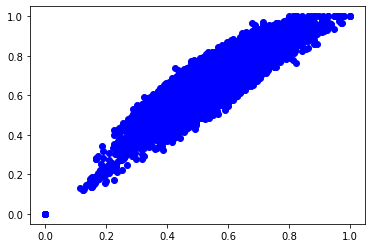

In [32]:
# store the column data for each attribute 
x = df.iloc[:, most_corr[0]]
y = df.iloc[:, most_corr[1]]

# get rid of the outlier by replacing it with the mean
xmean = x.mean()
ymean = y.mean()

for i in range(len(x)):
    if x[i] > 100:
        x[i] = xmean
    if y[i] > 100:
        y[i] = ymean

plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

The x values are attribute 2 (n_unique_tokens) and the y values are attribute 4 (n_non_stop_unique_tokens)

If they had a high correlation, we would observe a positive linear relationship among all the points in the graph. As x values trend higher, so do y values. The above graph certainly has a posilite linear pattern, which suggests that the correlation corefficient agrees with our data. 

From the csv source: 

n_unique_tokens: Rate of unique words in the content

n_non_stop_unique_tokens: Rate of unique non-stop words in the content

These are similar attributes so it makes sense that they are highly correlated. The calculations and the graphs prove that there is a high correlation between these two attributes


### Scatterplot - Most Anti-Correlated Attributes

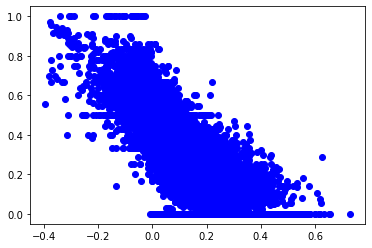

In [33]:
# store the column data for each attribute 
x = df.iloc[:, anti_corr[0]]
y = df.iloc[:, anti_corr[1]]

plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

The x values are attribute 17 (global_sentiment_popularity) and the y values are attribute 21 (rate_negative_words). 

Two attributes with that are highly anti correlated will exhibit a negative linear relationship when plotted. The above scatterplot certainly shows a negative linear relationship between the x and y values. As x increases, y will decrease. 

From the csv source:

global_sentiment_polarity: Text sentiment polarity

rate_negative_words: Rate of negative words among non-neutral tokens

The text sentiment will be high when the text is positive and low when the text is negative. Naturally, it makes sense that these two attributes are anti-correlated. If the rate of negative words is high, the text sentiment polarity is low. This is clearly reflected in the correlation calculations, and in the scatterplot. 

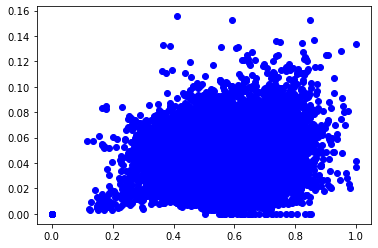

In [34]:
# store the column data for each attribute 
x = df.iloc[:, least_corr[0]]
y = df.iloc[:, least_corr[1]]

plt.scatter(x, y, c ="blue")

# To show the plot
plt.show()